In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns=['Id', 'Gender','Age','Income','Score']

In [5]:
df.head()

,Id,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop('Id', axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
Gender

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [12]:
df.drop('Gender', axis=1,inplace=True)

In [13]:
df = pd.concat([df,Gender],axis=1)

In [14]:
df.head()

,Age,Income,Score,Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


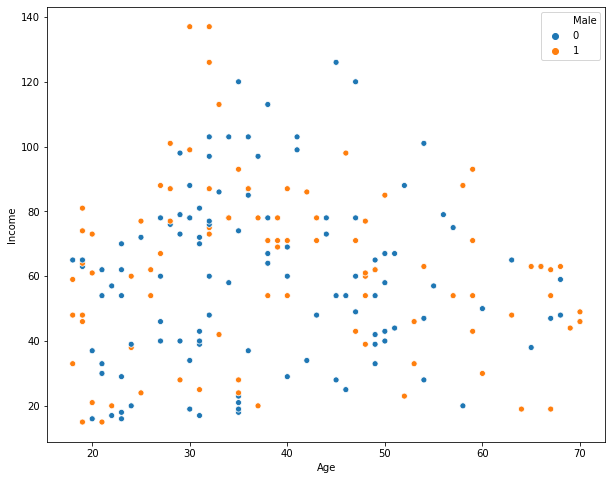

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Income',hue='Male', data=df)

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=4).fit(df)

In [18]:
centroids = km.cluster_centers_

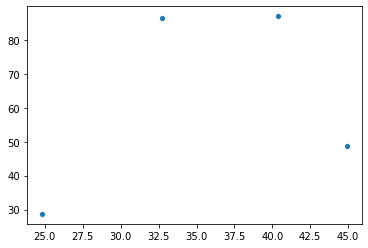

In [19]:
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])

In [20]:
centroids

array([[24.82142857, 28.71428571, 74.25      ,  0.5       ],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [40.39473684, 87.        , 18.63157895,  0.52631579],
       [44.89473684, 48.70526316, 42.63157895,  0.37894737]])

In [21]:
km.labels_

array([0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [22]:
pred = pd.DataFrame(data = km.labels_)
pred.columns=['Pred']

In [23]:
pred.head()

,Pred
0,0
1,0
2,3
3,0
4,3


In [24]:
df = pd.concat([df,pred],axis=1)

In [25]:
df.head()

,Age,Income,Score,Male,Pred
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,3
3,23,16,77,0,0
4,31,17,40,0,3


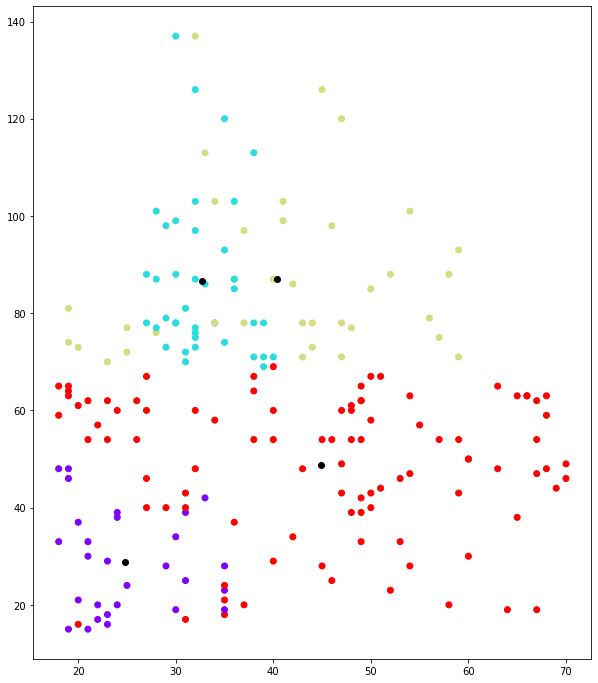

In [26]:
plt.figure(figsize=(10,12))
plt.scatter(x='Age',y='Income', data=df,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

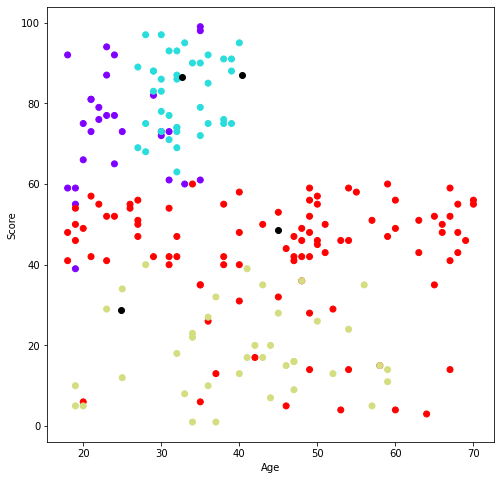

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x='Age',y='Score', data=df,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()

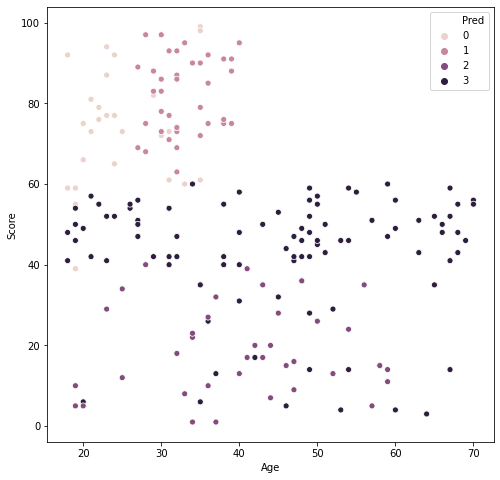

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Score',hue='Pred', data=df,cmap='Pastel1')

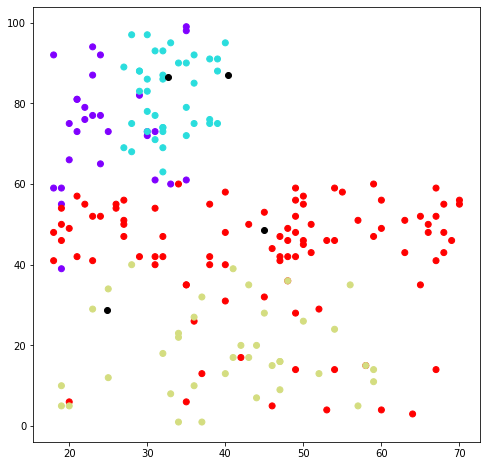

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(x='Age',y='Score', data=df,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

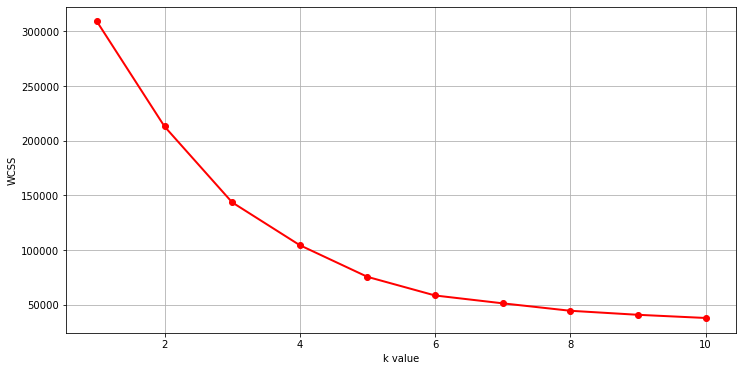

In [30]:
wcss= []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker=".", markersize=12)
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.show()

In [31]:
km = KMeans(n_clusters=5)
pred = km.fit_predict(df)

In [32]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

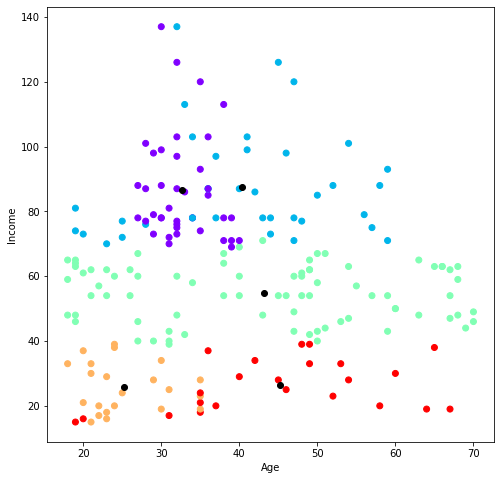

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(x='Age',y='Income', data=df,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

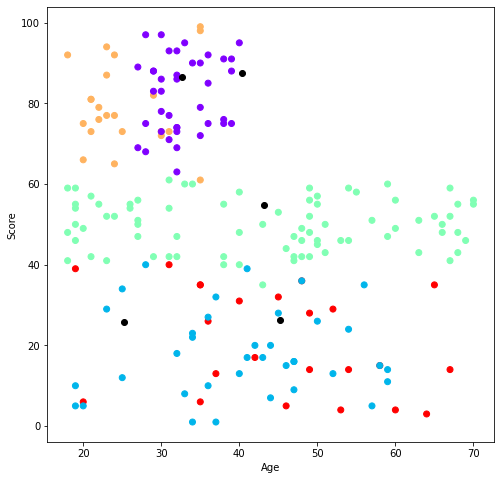

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(x='Age',y='Score', data=df,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()